In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('airline_tweets.csv')

In [3]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

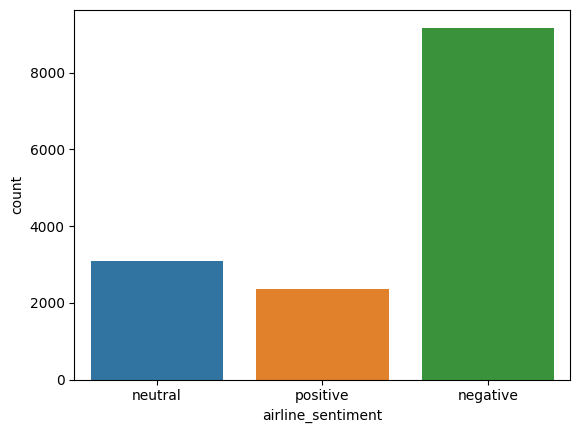

In [4]:
sns.countplot(data =df , x = 'airline_sentiment')

In [7]:
df['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

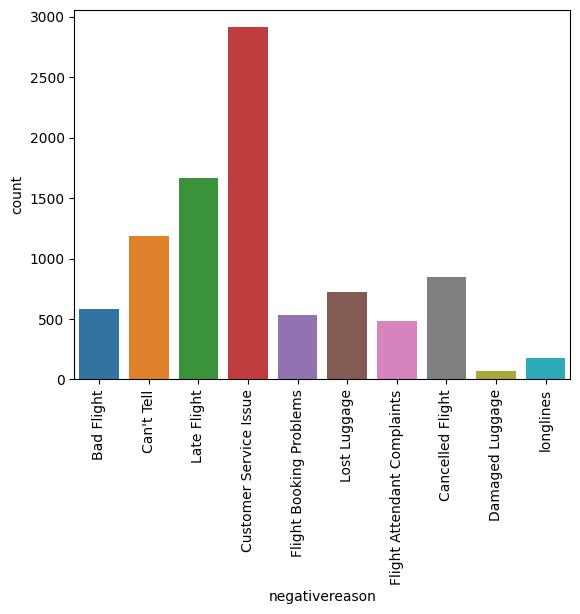

In [10]:
sns.countplot(data=df , x = 'negativereason')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='airline', ylabel='count'>

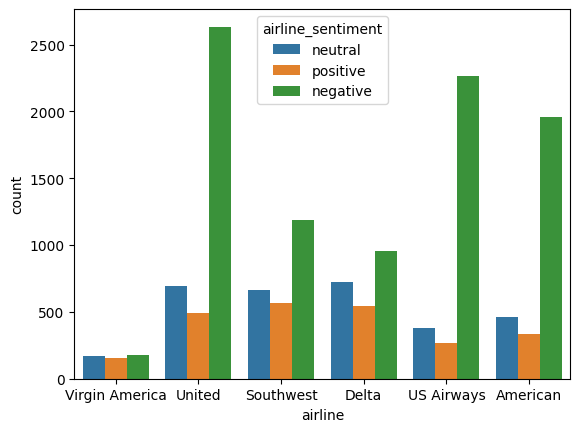

In [12]:
sns.countplot(data=df , x='airline' , hue = 'airline_sentiment')

In [13]:
data = df[['airline_sentiment','text']]

In [14]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [15]:
X = data['text']

In [16]:
y= data['airline_sentiment']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf = TfidfVectorizer(stop_words='english')

In [24]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [25]:
X_train_tfidf = tfidf.transform(X_train)

In [26]:
X_test_tfidf = tfidf.transform(X_test)

In [29]:
X_test_tfidf

<2928x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 24951 stored elements in Compressed Sparse Row format>

In [31]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [32]:
from sklearn.svm import SVC
rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf , y_train)

SVC()

In [35]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [37]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [38]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [49]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model , X_test_tfidf,y_test)

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



C:\Users\markp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


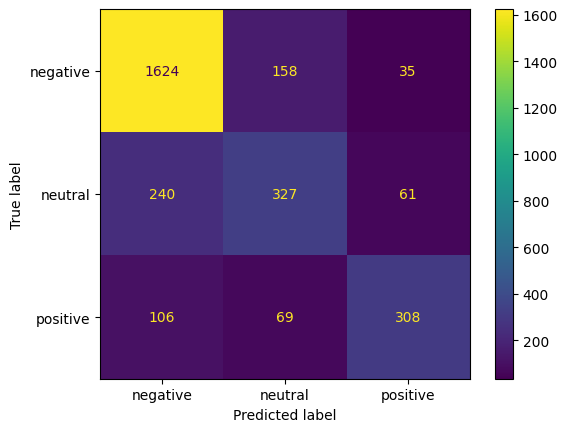

In [55]:
report(linear_svc)

In [56]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {'C':[0.01,0.1,0.9,1,10,100,1000],
             'gamma':['scale', 'auto']}

In [65]:
grid_rbfSvc = GridSearchCV(rbf_svc , param_grid)

In [66]:
grid_rbfSvc.fit(X_train_tfidf,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.9, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto']})

In [67]:
grid_rbfSvc.best_params_

{'C': 10, 'gamma': 'scale'}

              precision    recall  f1-score   support

    negative       0.81      0.92      0.87      1817
     neutral       0.64      0.49      0.56       628
    positive       0.77      0.62      0.69       483

    accuracy                           0.78      2928
   macro avg       0.74      0.68      0.70      2928
weighted avg       0.77      0.78      0.77      2928



C:\Users\markp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


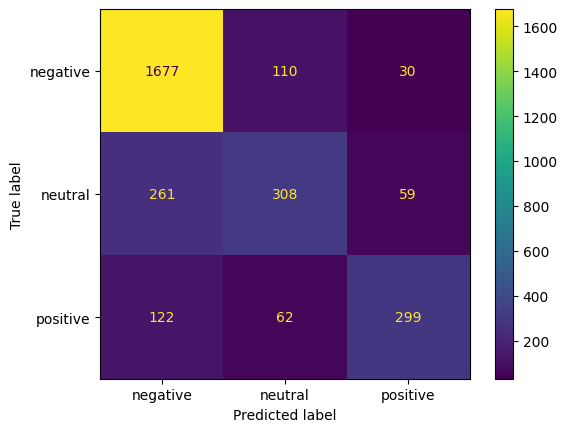

In [70]:
report(grid_rbfSvc)

In [72]:
rbf= SVC(C= 10, gamma= 'scale')

In [74]:
rbf.fit(X_train_tfidf,y_train)

SVC(C=10)

In [75]:
from sklearn.pipeline import Pipeline

In [76]:
pipe = Pipeline([('tfidf' , TfidfVectorizer()) ,('rbf' , SVC(C= 10, gamma= 'scale'))])

In [78]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rbf', SVC(C=10))])

In [95]:
pipe.predict(['not good'])

array(['negative'], dtype=object)